In [15]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataset_names = [
         #'adult',
         #'Amazon_employee_access',
         #'bank-marketing',
         'Click_prediction_small',
        # 'credit-g',
         ]

In [17]:
auto_ml_names = [
    'automl_alex',
    'tpot',
    'h2o',
    'Auto_ml',  
    'lightgbm-default',
    #'lightgbm-opt',
    'catboost-default',
    ]

In [18]:
METRIC = 'AUC'
metrics = ['AUC', 
#'log_loss', 
#'Accuracy'
]

Click_prediction_small
                      AUC
tpot              0.71136
lightgbm-default  0.71598
Auto_ml           0.71884
catboost-default  0.71912
h2o               0.72056
automl_alex       0.72306


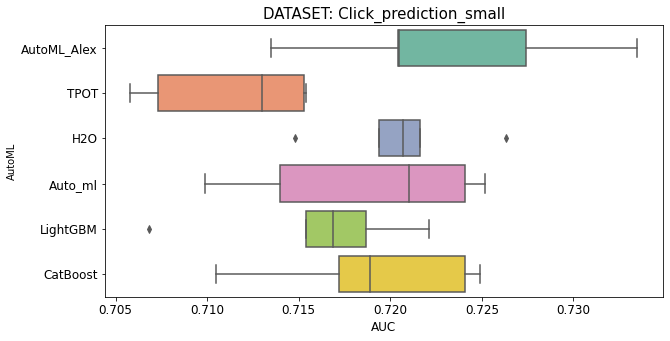

In [19]:
total_place = pd.DataFrame()
for metric in metrics:
    bench_result = {}
    for name in auto_ml_names:
        bench_result[name] = 0
    for dataset_name in dataset_names:
        print(dataset_name)
        bench_auc = []
        bench_auc_std = []
        all_df = pd.DataFrame()
        for AUTOML in auto_ml_names:
            result = pd.read_csv(f'./frameworks/{AUTOML}/result/{dataset_name}_{AUTOML}_metrics.csv')
            bench_auc.append(result[metric].mean())
            bench_auc_std.append(result[metric].std())
            #tmp_df = result[metric]
            #tmp_df.columns = [AUTOML]
            all_df[AUTOML] = result[metric]
        res = pd.DataFrame(bench_auc, columns=[METRIC,], index=auto_ml_names).sort_values(by=[METRIC])
        print(res)
        res_std = pd.DataFrame(bench_auc_std, columns=[METRIC,], index=auto_ml_names).sort_values(by=[METRIC])

        #save plot
        all_df.columns = ['AutoML_Alex', 'TPOT', 'H2O', 'Auto_ml', 'LightGBM', 'CatBoost',]
        plt.figure(figsize=(10,5),)
        sns.boxplot(data=all_df, orient="h", palette="Set2",).set_title('DATASET: '+dataset_name, size = 15,)
        plt.tick_params(labelsize=12)
        plt.ylabel("AutoML", size=10,)
        plt.xlabel("AUC", size=12)
        plt.savefig(f'{dataset_name}.png')

        for i, name in enumerate(res.index):
            bench_result[res.index[i]] += i+1
            #total_place.append(bench_result)
            bench = pd.io.json.json_normalize(bench_result,).T
            bench.columns = [f'{metric} place']
    total_place = pd.concat([total_place, bench], axis=1, sort=False)
            #bench = bench.sort_values(by=f'{metric} place', ascending=False)
            #bench.to_csv(f'{metric}_place.csv',)
#result.head(5)

In [20]:
total_place

,AUC place
automl_alex,6
tpot,1
h2o,5
Auto_ml,3
lightgbm-default,2
catboost-default,4


In [21]:
res_std

,AUC
h2o,0.004140
tpot,0.004526
lightgbm-default,0.005708
catboost-default,0.005836
Auto_ml,0.006636
automl_alex,0.007630
